# Linear regression with one variable

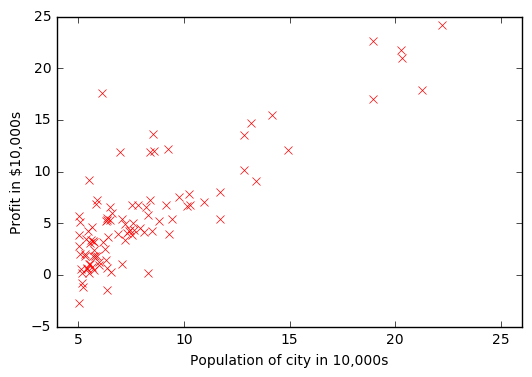

In [1]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt('ex1data1.txt', delimiter=',')
X = data[:,0] # input values
y = data[:,1] # target values
m = np.size(y) # dataset size

plt.plot(X,y,'rx') # plt.plot(x_axis, y_axis, 'color+plot_type')
plt.axis([4, 26, -5, 25]) # plt.axis([xmin, xmax, ymin, ymax])
plt.xlabel('Population of city in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.show()

## Gradient descent

In [2]:
a = np.ones([m,1]) # vector of intercept terms
X = np.reshape(X,[97,1])
y = np.reshape(y,[97,1])
X = np.column_stack([a,X]) # X + intercept term x0 = 1

In [3]:
theta = np.zeros([2,1]) # initialization of theta parameters
iterations = 1500 # number of iterations for gradient descent
alpha = 0.01 # learning rate

In [4]:
def compute_cost(X,y,theta):
    m = np.size(y)
    XTheta = np.matmul(X,theta)
    diff = XTheta - y
    cost = np.sum(diff**2)/(2*m)
    return cost

In [5]:
def gradient_descent(X,y,theta,alpha,num_iters):
    m = np.size(y)
    J_history = np.zeros([num_iters, 1])
    for i in np.arange(0,num_iters):
        XTheta = np.matmul(X,theta)
        theta = theta - alpha*np.matmul(X.T,(XTheta-y))/m
        J_history[i] = compute_cost(X,y,theta)
    return (theta, J_history)

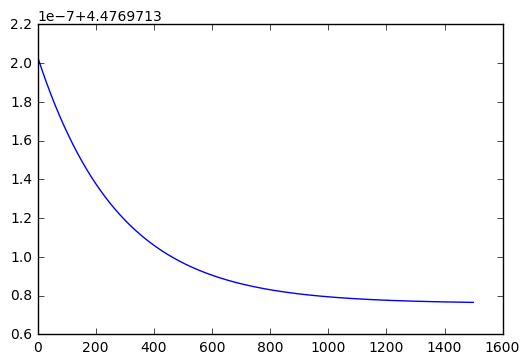

In [9]:
J = compute_cost(X,y,theta)
(theta, J_history) = gradient_descent(X,y,theta,alpha,iterations)

plt.plot(np.arange(0,np.size(J_history)), J_history)
plt.show()

In [10]:
print("Initial cost is J =",J)
print("Theta found by the gradient theta = [{} {}]".format(theta[0], theta[1]))

Initial cost is J = 4.4769715036
Theta found by the gradient theta = [[-3.89570181] [ 1.1930257]]


In [11]:
population1 = np.array([1, 3.5])
predict1 = np.matmul(population1,theta)*10000
population2 = np.array([1, 7])
predict2 = np.matmul(population2,theta)*10000

In [12]:
print("For population of {} we predict profit = {}".format(int(population1[1]* 10000), predict1[0]))
print("For population of {} we predict profit = {}".format(population2[1]* 10000, predict2[0]))

For population of 35000 we predict profit = 2798.881440977903
For population of 70000 we predict profit = 44554.78096841927


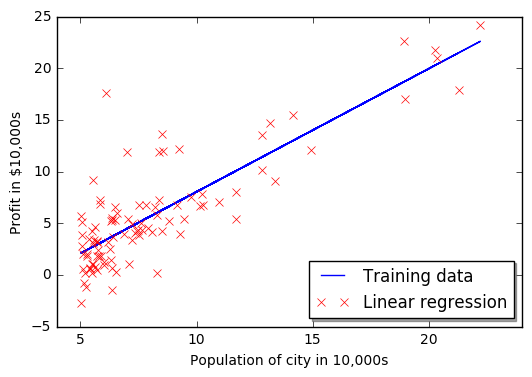

In [13]:
#fig, ax = plt.subplots()

plt.plot(X[:,1], np.matmul(X,theta), label = 'Training data')
plt.plot(X[:,1], y, 'rx', label = 'Linear regression')
plt.xlabel('Population of city in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.axis([4,24,-5,25])
plt.legend(loc='lower right', shadow=True)
plt.show()